# Notebook used for function writing

In [1]:
import pandas as pd
import sys
import os
#Define user path
sys.path.append(os.path.abspath('../'))

from galpy.df import streamdf, streamgapdf
from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import conversion
import numpy


## Tests on stream_sim

In [2]:
##Load sts config file
# Path to the yaml config file in the 'config' folder
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
config_file = 'erkal_2016_pal_5_input.csv'
config_path = os.path.join(base_dir, 'generated_data', config_file)

derkal_data = pd.read_csv(config_path)

#config_data
print(derkal_data['nstars']*(0.02*derkal_data['width']))
numpy.sum(derkal_data['nstars']*(0.02*derkal_data['width']))



0       0.004239
1       0.004309
2       0.004381
3       0.004453
4       0.004525
          ...   
1142    0.000796
1143    0.000784
1144    0.000772
1145    0.000759
1146    0.000748
Length: 1147, dtype: float64


np.float64(8.341058536168287)

In [ ]:
###what's nstars ?


## Mock stream generation

In [3]:
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)
prog_unp_peri= Orbit([2.6556151742081835,
                          0.2183747276300308,
                          0.67876510797240575,
                          -2.0143395648974671,
                          -0.3273737682604374,
                          0.24218273922966019])
V0, R0= 220., 8.
sigv= 0.365*(10./2.)**(1./3.) # km/s
tdisrupt= 10.88/conversion.time_in_Gyr(V0,R0)
print(tdisrupt)


305.9954797816719


In [4]:
GM= 10.**-2./conversion.mass_in_1010msol(V0,R0)
rs= 0.625/R0
impactb= 0.
subhalovel= numpy.array([6.82200571,132.7700529,149.4174464])/V0
timpact= 0.88/conversion.time_in_Gyr(V0,R0)
impact_angle= -2.34
print(timpact)

24.74963439410582


In [7]:
sdf_sanders15= streamgapdf(sigv/V0,progenitor=prog_unp_peri,pot=lp,aA=aAI,
                               leading=False,nTrackChunks=26,
                               nTrackIterations=1,
                               sigMeanOffset=4.5,
                               tdisrupt=tdisrupt,
                               Vnorm=V0,Rnorm=R0,
                               impactb=impactb,
                               subhalovel=subhalovel,
                               timpact=timpact,
                               impact_angle=impact_angle,
                               GM=GM,rs=rs)


: 

        phi1                phi2         nstars width
------------------- -------------------- ------ -----
               -6.0               -2.375      4   0.2
               -5.8               -2.375     16   0.2
               -5.6  -1.7916666666666667     27   0.2
-5.3999999999999995  -1.7916666666666667     22   0.2
 -5.199999999999999 -0.29166666666666674     20   0.2
 -4.999999999999999 -0.29166666666666674     20   0.2
 -4.799999999999999  -1.4583333333333335     15   0.2
 -4.599999999999999  -1.9583333333333335     15   0.2
 -4.399999999999999  -1.7083333333333335     19   0.2
 -4.199999999999998  -0.7916666666666667     24   0.2
                ...                  ...    ...   ...
 14.000000000000018  -1.0416666666666667     20   0.2
 14.200000000000017   -2.458333333333333     16   0.2
  14.40000000000002   -2.458333333333333     17   0.2
  14.60000000000002  -1.9583333333333335     19   0.2
 14.800000000000018   -2.208333333333333     24   0.2
 15.000000000000018  -0.7083

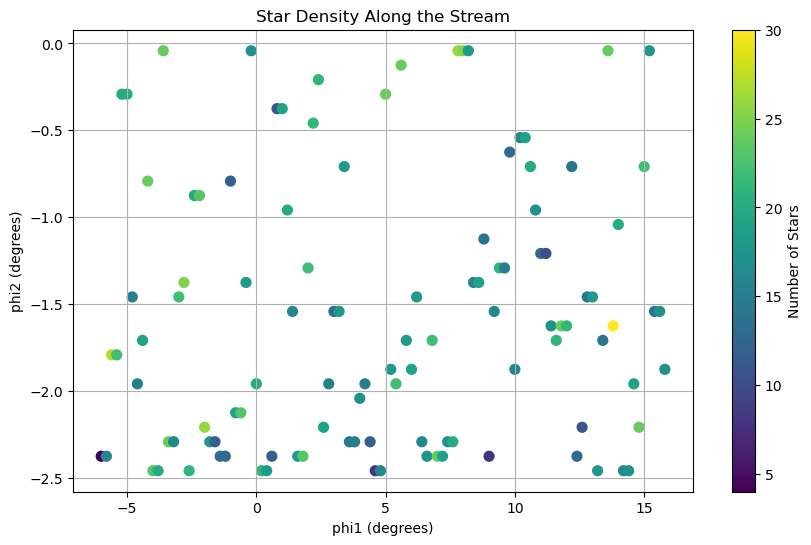

In [2]:
import numpy as np
import astropy.units as u
import astropy.coordinates as coord
from astropy.table import Table
import matplotlib.pyplot as plt

# Simulate more stars (more realistic data)
np.random.seed(42)
phi1_stars = np.random.uniform(-6, 16, 1000)  # 1000 stars in the range [-6, 16]
phi2_stars = np.random.uniform(-2.5, 0, 1000)  # 1000 stars in the range [-2.5, 0]

# Define the stream window (user-defined)
phi1_min, phi1_max = -6, 16  # Phi1 window
phi2_min, phi2_max = -2.5, 0  # Phi2 window

# Define the user-given step size in Phi1 (in degrees)
phi1_step = 0.2  # Example: scan every 1 degree in Phi1

# Step 1: Initialize empty lists for each column in the results table
phi1_vals = []
phi2_vals = []
nstars_vals = []
width_vals = []

# Step 2: Loop through Phi1 window with given step size
for phi1_t in np.arange(phi1_min, phi1_max, phi1_step):
    # Define the window around the current Phi1 point
    # Here we are using a fixed width (for simplicity, can adjust this further)
    width = 0.2  # You can adjust this value or make it dynamic
    mask_phi1 = (np.abs(phi1_stars - phi1_t) < width)

    # Select the stars within the Phi1 window
    selected_phi1 = phi1_stars[mask_phi1]
    selected_phi2 = phi2_stars[mask_phi1]

    # Step 3: Find the Phi2 corresponding to maximum star density
    # We can use histogram to find the mode of Phi2 (max density)
    if len(selected_phi1) > 0:
        hist_phi2, bin_edges = np.histogram(selected_phi2, bins=30, range=(phi2_min, phi2_max))
        max_bin_idx = np.argmax(hist_phi2)  # Index of maximum density
        max_phi2 = (bin_edges[max_bin_idx] + bin_edges[max_bin_idx + 1]) / 2  # The middle of the bin
        
        # Step 4: Count the stars in this region (n_stars)
        n_stars = np.sum(mask_phi1)

        # Append the results for this step to the respective lists
        phi1_vals.append(phi1_t)
        phi2_vals.append(max_phi2)
        nstars_vals.append(n_stars)
        width_vals.append(width)

# Step 3: Create a table to store the results
if phi1_vals:
    density_table = Table([phi1_vals, phi2_vals, nstars_vals, width_vals], 
                          names=('phi1', 'phi2', 'nstars', 'width'))

    # Print the table to verify the results
    print(density_table)

    # Plot the density in the frame (scatter plot of phi1, phi2 values)
    plt.figure(figsize=(10, 6))
    plt.scatter(density_table['phi1'], density_table['phi2'], c=density_table['nstars'], cmap='viridis', s=50)
    plt.colorbar(label='Number of Stars')
    plt.xlabel('phi1 (degrees)')
    plt.ylabel('phi2 (degrees)')
    plt.title('Star Density Along the Stream')
    plt.grid(True)
    plt.show()
else:
    print("No stars were found in the given window.")


In [ ]:
endpoints = coord.SkyCoord(
    ra=[-38.8, 4.7]*u.deg,
    dec=[-45.1, -51.7]*u.deg
)
great_circle_frame = gc.GreatCircleICRSFrame.from_endpoints(endpoints[0], endpoints[1], origin=origin)

In [ ]:
stars = coord.SkyCoord(
    ra=[10.0, 20.0, 30.0]*u.deg,
    dec=[-40.0, -42.0, -38.5]*u.deg,
    frame='icrs'
)

stars_transformed = stars.transform_to(great_circle_frame)

In [ ]:
popt, _ = opt.curve_fit(gaussian, phi2, nstars, p0=[max(nstars), phi2[np.argmax(nstars)], 1])

A_fit, mu_fit, sigma_fit = popt

plt.figure()

phi2_fine = np.linspace(-3, 2, 200)
plt.bar(phi2, nstars, width=0.1, edgecolor='b')
plt.plot(phi2_fine, gaussian(phi2_fine, *popt), 'r-', linewidth=2, label="Gaussian Fit")
plt.show()
print(f"Fitted Parameters: Amplitude = {A_fit:.2f}, Mean = {mu_fit:.2f}, Std Dev = {sigma_fit:.2f}")

# Main notebook addons

In [ ]:
### Modelise Non-perturbed stream using Chen2024 formalism

#initiate spray function, two parts ; leading and trailing part of the stream (leading = {True, False})
# stream_c24_lead = gd.chen24spraydf(progenitor_mass=prog_mass,
#                         progenitor=prog_orbit, 
#                         pot=mw_pot, rtpot=None, #host potential and tidal radius potential
#                         tdisrupt=t_disrupt, 
#                         leading=True, 
#                         center=None, centerpot=None, 
#                         progpot=prog_pot, 
#                         mean=None, cov=None, ro=None, vo=None)

# stream_c24_trail = gd.chen24spraydf(progenitor_mass=prog_mass,
#                         progenitor=prog_orbit, 
#                         pot=mw_pot, rtpot=None, #host potential and tidal radius potential
#                         tdisrupt=t_disrupt, 
#                         leading=False, 
#                         center=None, centerpot=None, 
#                         progpot=prog_pot, 
#                         mean=None, cov=None, ro=None, vo=None)


In [ ]:
# # Integrating the progenitor orbit back in time to get the orbit instance at t_disrupt
# ts= np.linspace(0.,4.5*u.Gyr,1000)
# prog_orbit.integrate(-ts,mw_pot)
# print(prog_orbit.x(t=-4.5*u.Gyr),prog_orbit.y(t=-4.5*u.Gyr),prog_orbit.z(t=-4.5*u.Gyr))
# # prog_orbit.plot3d(d1='x',d2='y', d3='z')
